# DSCI-633-2215 Lab #4 (Python)

## Part I. Gaussian Naive Bayes Classifier (w/o sklearn): Extra Points

### Complete Q4.1 -3 fit(), pedict() and accuracy() methods

In [145]:
# Import all needed libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [146]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem:
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def prior_prob(self, features, target):
        '''
        calculate prior probabilities P(y)
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def mean_var(self, features, target):
        '''
        calculate mean & variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed).
        we assume that probability of specific target value given specific class is normally distributed 
        probability density function:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance 
        (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def posterior_prob(self, x):
        posteriors = []
        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     
    def fit(self, features, target):
        # train (fit) features to build a model
        # Q4.1 complete this method
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.mean_var(features,target)
        self.prior_prob(features,target)
        
    def predict(self, features):
        # appply unknown features to predict posterior probabilities
        # Q4.2 complete this method
        preds = [self.posterior_prob(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        # calculate model accuracy
        # Q4.3 Complete this method
        accuracy = np.sum(y_test == y_pred)/len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()


In [147]:
# train the model
x = NaiveBayesClassifier()
# pre-process dataset for training 

# upload Iris dataset -  shape is (150, 5)
df = pd.read_csv("C:/Users/niles/Desktop/iriscsv.csv")
# shuffle dataset with sample
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
# df shape
print(df.shape)
# set features and target
X, y = df.iloc[:, :-1], df.iloc[:, -1]


# # split on train and test 70/30
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(150, 5)
(100, 4) (100,)
(50, 4) (50,)


In [148]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.8,4.0,1.2,0.2,Iris-setosa
1,5.1,2.5,3.0,1.1,Iris-versicolor
2,6.6,3.0,4.4,1.4,Iris-versicolor
3,5.4,3.9,1.3,0.4,Iris-setosa
4,7.9,3.8,6.4,2.0,Iris-virginica
...,...,...,...,...,...
145,6.3,2.8,5.1,1.5,Iris-virginica
146,6.4,3.1,5.5,1.8,Iris-virginica
147,6.3,2.5,4.9,1.5,Iris-versicolor
148,6.7,3.1,5.6,2.4,Iris-virginica


In [149]:
X_train.shape

(100, 4)

In [150]:
x.prior_prob

<bound method NaiveBayesClassifier.prior_prob of <__main__.NaiveBayesClassifier object at 0x00000221DBC2D540>>

In [151]:

x.mean_var(X_train, y_train)

C:\Users\niles\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([[5.08387097, 3.50322581, 1.46129032, 0.24193548],
        [5.9125    , 2.790625  , 4.275     , 1.33125   ],
        [6.71891892, 2.98918919, 5.63243243, 2.05675676]]),
 array([[0.11361082, 0.10934443, 0.02430801, 0.00953174],
        [0.21296875, 0.08272461, 0.185625  , 0.03214844],
        [0.3566691 , 0.11339664, 0.32867787, 0.0592111 ]]))

In [152]:
x.mean

array([[5.08387097, 3.50322581, 1.46129032, 0.24193548],
       [5.9125    , 2.790625  , 4.275     , 1.33125   ],
       [6.71891892, 2.98918919, 5.63243243, 2.05675676]])

In [153]:
x.var

array([[0.11361082, 0.10934443, 0.02430801, 0.00953174],
       [0.21296875, 0.08272461, 0.185625  , 0.03214844],
       [0.3566691 , 0.11339664, 0.32867787, 0.0592111 ]])

In [154]:
X_train

,sepallength,sepalwidth,petallength,petalwidth
0,5.8,4.0,1.2,0.2
1,5.1,2.5,3.0,1.1
2,6.6,3.0,4.4,1.4
3,5.4,3.9,1.3,0.4
4,7.9,3.8,6.4,2.0
...,...,...,...,...
95,6.7,3.0,5.2,2.3
96,6.3,2.3,4.4,1.3
97,6.2,3.4,5.4,2.3
98,7.2,3.6,6.1,2.5


In [155]:
x.fit(X_train, y_train)

C:\Users\niles\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [156]:
predictions = x.predict(X_test)

In [157]:
x.accuracy(y_test, predictions)

0.92

In [158]:
y_test.value_counts(normalize=True)

Iris-setosa        0.38
Iris-versicolor    0.36
Iris-virginica     0.26
Name: class, dtype: float64

ValueError: min() arg is an empty sequence

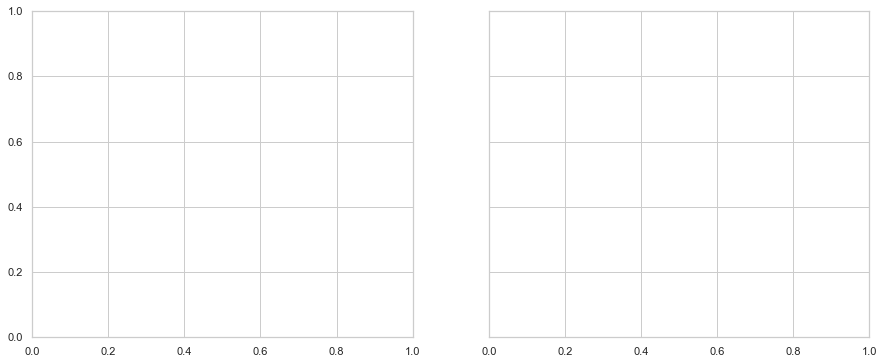

In [159]:
x.visualize(y_test, predictions, 'variety')#seaborn errors, tried fixing.

## Part II. sklearn Gaussian Naive Bayes Classifier
### split on train and test 70/30 (iris.csv)

In [160]:
# compare to sklearn Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [161]:
# Q4.4 instantiate the GaussianNB classifier
clf = GaussianNB()

In [162]:
# Q4.5 fit (train) the model with iris dataset used in Part I
clf.fit(X_train,y_train)

GaussianNB()

In [163]:
# Q4.6 test (predict) the model 
preds = clf.predict(X_test)

In [164]:
# Q4.7 calculate the predicted model accuracy
clf.score(X_test,y_test)

0.92

ValueError: min() arg is an empty sequence

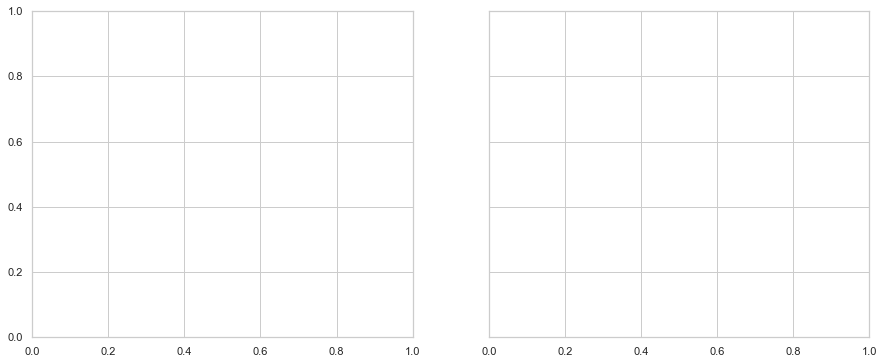

In [165]:
tr = pd.DataFrame(data=y_test, columns=['variety'])
pr = pd.DataFrame(data=preds, columns=['variety'])


fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))

sns.countplot(x='variety', data=tr, ax=ax[0], palette='viridis', alpha=0.7)
sns.countplot(x='variety', data=pr, ax=ax[1], palette='viridis', alpha=0.7)


fig.suptitle('True vs Predicted Comparison', fontsize=20)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[0].set_title("True values", fontsize=18)
ax[1].set_title("Predicted values", fontsize=18)
plt.show()
## getting errors with seaborn, tried pip install, didnt work. not req by question I hope.

## Part III. Weka Naive Bayes
### split on train and test 70/30 (iris.csv)
### Q4.7 Enter accuracy here:

In [166]:
#94.1176% on 66% percent split.